# DECIDING WHETHER GO TO SHOW OR NOT

Depend on features decide whether to go to the comedy show or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA

In [2]:
df = pd.read_csv('DATA/shows.csv')
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


<AxesSubplot: xlabel='Go', ylabel='count'>

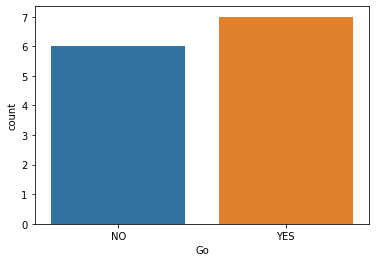

In [3]:
sns.countplot(data=df, x='Go')

In [4]:
df['Nationality'].unique()

array(['UK', 'USA', 'N'], dtype=object)

Convert 'Nationality' to dummies.

Convert 'YES'-->1  and 'NO'-->0  for 'Go'

In [5]:
df['Go'] = df['Go'].apply(lambda x: 1 if x=='YES' else 0)
dummy = pd.get_dummies(df['Nationality'], drop_first=True)
df = df.join(dummy)
df.drop('Nationality', axis=1, inplace=True)
df

,Age,Experience,Rank,Go,UK,USA
0,36,10,9,0,1,0
1,42,12,4,0,0,1
2,23,4,6,0,0,0
3,52,4,4,0,0,1
4,43,21,8,1,0,1
5,44,14,5,0,1,0
6,66,3,7,1,0,0
7,35,14,9,1,1,0
8,52,13,7,1,0,0
9,35,5,9,1,0,0


#### Correlations

In [6]:
df.corr()['Go'].sort_values()

USA          -0.385758
UK            0.097590
Experience    0.170393
Age           0.202121
Rank          0.679815
Go            1.000000
Name: Go, dtype: float64

<AxesSubplot: >

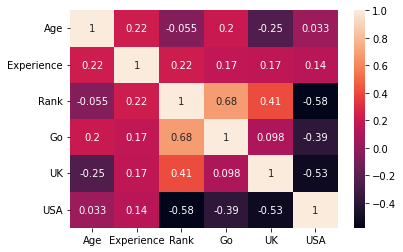

In [7]:
sns.heatmap(data=df.corr(), annot=True)

### PREPARING THE DATA

We take high test ratio since there isn't enough example.

In [8]:
X = df.drop('Go', axis=1)
y = df['Go']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### DECISION TREE CLASSIFIER

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

##### PERFORMANCE EVALUATION

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

##### TRAIN DATA

In [11]:
train_y_pred = tree.predict(X_train)
print(classification_report(y_train, train_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



##### TEST DATA

In [12]:
test_y_pred = tree.predict(X_test)
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



Confusion Matrix

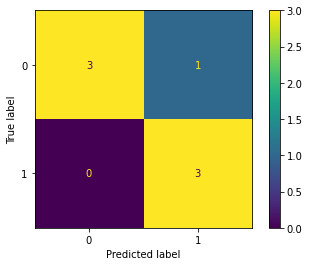

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, test_y_pred);

#### VISUALIZING THE TREE

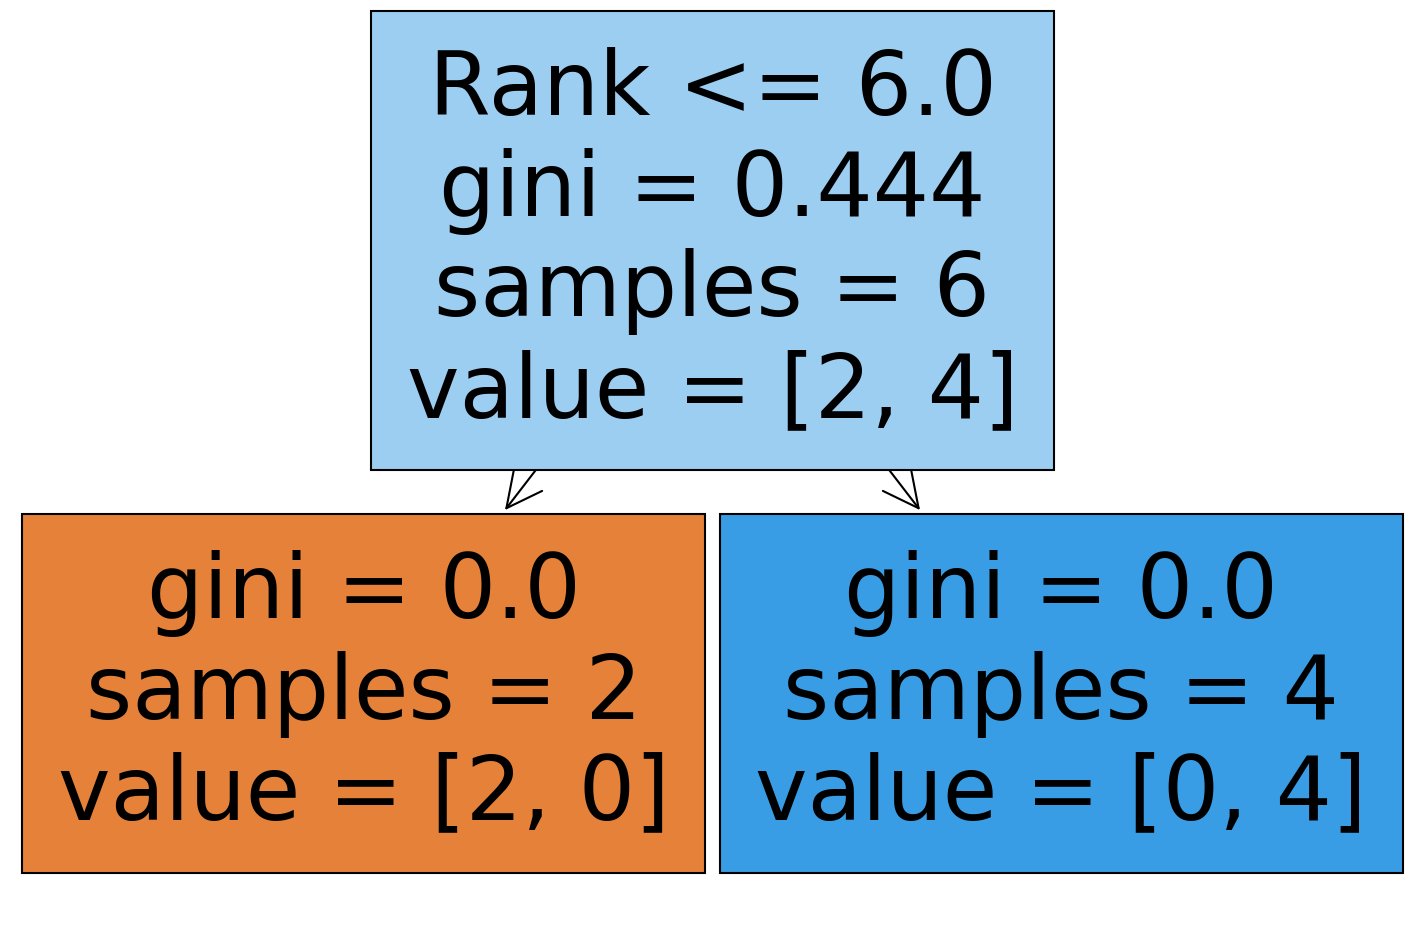

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree,filled=True,feature_names=X.columns);